# Midterm Review

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
from scipy.special import comb
from scipy.stats import binom
from itertools import combinations
from numpy.random import rand

In [3]:
%config InlineBackend.figure_format = "retina"

## Question 1

In [4]:
A = np.array([
    [0, 1, 0, 1, 0, 0],
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 1, 0, 0],
    [1, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 1, 0]
])

# out-degree
A.sum(axis=0)

array([2, 3, 1, 2, 1, 1])

In [5]:
# in-degree
A.sum(axis=1)

array([2, 1, 2, 3, 1, 1])

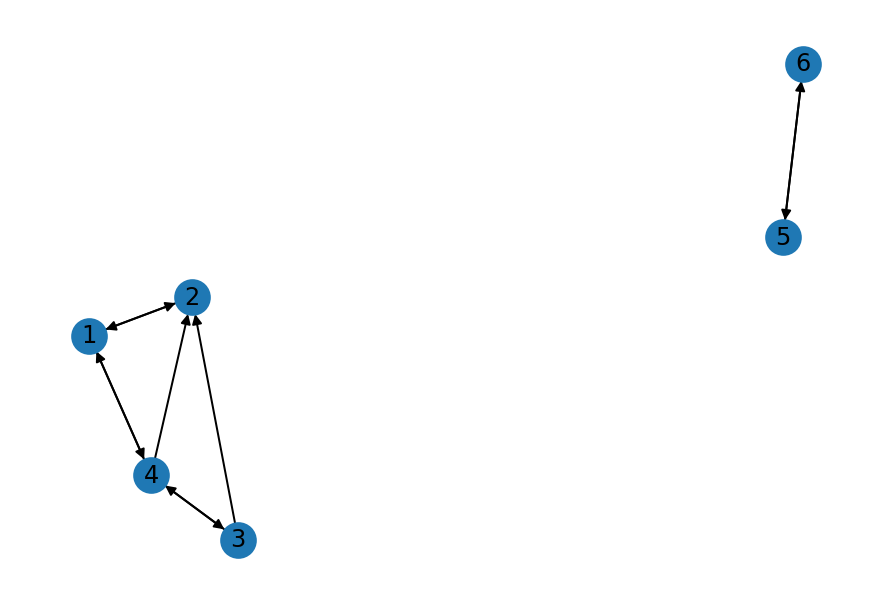

In [6]:
G = nx.DiGraph(A)
G = nx.relabel.relabel_nodes(G, {i: i+1 for i in range(6)})
nx.draw(G, with_labels=True)

In [7]:
H = np.array([
    [0, 1, 0, 1, 0, 1],
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 1, 0, 0],
    [1, 1, 1, 0, 0, 0],
    [1, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 1, 0]
])

N, _ = H.shape

Gh = nx.DiGraph(H)
Gh = nx.relabel_nodes(Gh, {i: i+1 for i in range(6)})

In [8]:
DH = np.zeros((N, N))
for node, path in nx.all_pairs_shortest_path_length(Gh):
    for end_node, lenght in path.items():
        DH[node-1, end_node-1] = lenght
DH

array([[0., 1., 2., 1., 2., 1.],
       [1., 0., 3., 2., 3., 2.],
       [2., 1., 0., 1., 4., 3.],
       [1., 1., 1., 0., 3., 2.],
       [1., 2., 3., 2., 0., 1.],
       [2., 3., 4., 3., 1., 0.]])

In [9]:
DH.sum()

59.0

In [10]:
DH.sum(axis=1) / DH.sum()

array([0.11864407, 0.18644068, 0.18644068, 0.13559322, 0.15254237,
       0.22033898])

## Question 2

In [11]:
N = 6
p = 0.3

k = 4

In [12]:
binom.pmf(k, N, p)


0.05953499999999999

In [13]:
comb(N-1, k)

5.0

In [14]:
def Gb(N, p):
    links = [link for link in combinations(range(N), 2) if rand() > p]
    return links

In [15]:
n_rounds = 10_000

p_vec = np.zeros(n_rounds)
for n in range(n_rounds):
    G = nx.from_edgelist(Gb(N, p))
    pv = np.array(G.degree)[:, 1]
    pv = (pv == k).any()
    p_vec[n] = pv

In [16]:
G = nx.from_edgelist(Gb(N, p))
np.array(G.degree)[:, 1]

array([2, 3, 4, 3, 1, 3])

In [17]:
p_vec.mean()

0.9052

# Question1 

In [18]:
A = np.array([
    [0, 1, 1, 1, 1],
    [1, 0, 1, 1, 0],
    [1, 1, 0, 0, 1],
    [1, 1, 0, 0, 0],
    [1, 0, 1, 0, 0]
])

N, N = A.shape

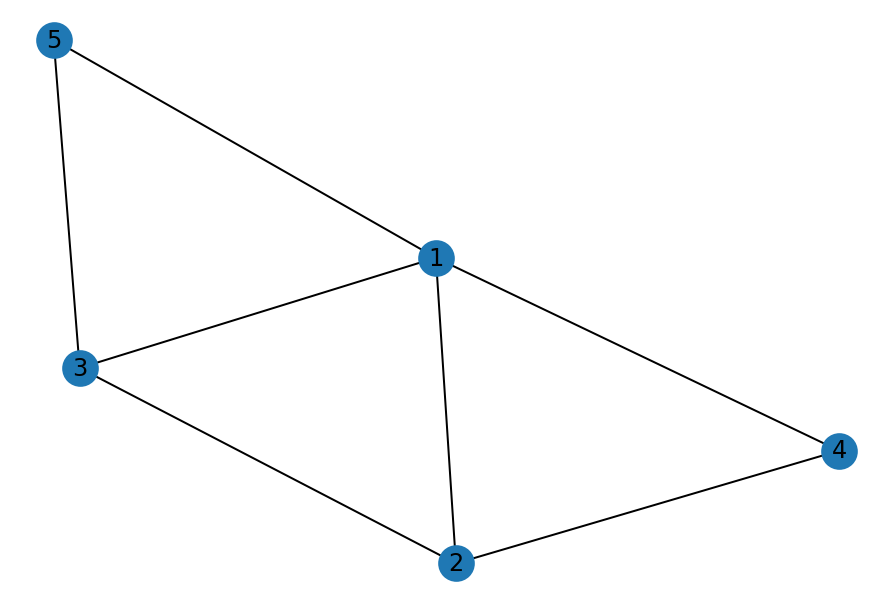

In [19]:
G = nx.Graph(A)
G = nx.relabel_nodes(G, {i: i+1 for i in range(5)})
nx.draw(G, with_labels=True)

In [20]:
b = np.array([4, 3, 3, 2, 2])

In [21]:
np.linalg.solve(A, b)

array([1., 1., 1., 1., 1.])

In [22]:
nx.clustering(G)

{1: 0.5, 2: 0.6666666666666666, 3: 0.6666666666666666, 4: 1.0, 5: 1.0}

In [23]:
nx.cluster.transitivity(G)

0.6428571428571429

In [24]:
nx.cluster.average_clustering(G)

0.7666666666666666

In [25]:
nx.induced_subgraph(G, [1, 2, 3, 4]).edges

EdgeView([(1, 2), (1, 3), (1, 4), (2, 3), (2, 4)])

In [26]:
len(nx.induced_subgraph(G, [1, 2, 3, 4]).edges)

5

In [27]:
A

array([[0, 1, 1, 1, 1],
       [1, 0, 1, 1, 0],
       [1, 1, 0, 0, 1],
       [1, 1, 0, 0, 0],
       [1, 0, 1, 0, 0]])

In [39]:
np.linalg.matrix_power(A, 2)

array([[4, 2, 2, 1, 1],
       [2, 3, 1, 1, 2],
       [2, 1, 3, 2, 1],
       [1, 1, 2, 2, 1],
       [1, 2, 1, 1, 2]])

In [28]:
np.linalg.matrix_power(A, 3)

array([[6, 7, 7, 6, 6],
       [7, 4, 7, 5, 3],
       [7, 7, 4, 3, 5],
       [6, 5, 3, 2, 3],
       [6, 3, 5, 3, 2]])

In [29]:
n_triangles_node = np.diag(np.linalg.matrix_power(A, 3)) / 2
n_triangles_node

array([3., 2., 2., 1., 1.])

In [30]:
n_triples = b * (b - 1) / 2
n_triples

array([6., 3., 3., 1., 1.])

In [31]:
node_clustering = n_triangles_node / n_triples
node_clustering

array([0.5       , 0.66666667, 0.66666667, 1.        , 1.        ])

In [32]:
node_clustering.mean()

0.7666666666666666

In [33]:
from fractions import Fraction

In [34]:
Fraction(1, 5) * (Fraction(1, 2) + Fraction(2, 3) + Fraction(2, 3) + 1 + 1) * 1.

0.7666666666666667

In [36]:
I00 = np.ones((N, N))
I00[np.diag_indices_from(I00)] = 0
n_triangles = np.trace(np.linalg.matrix_power(A, 3)) / 6 
n_triads = np.trace(np.linalg.matrix_power(A, 2) @ I00) / 2
n_triangles, n_triads

(3.0, 14.0)

In [42]:
np.diag(np.linalg.matrix_power(A, 3))

array([6, 4, 4, 2, 2])

In [43]:
np.diag(np.linalg.matrix_power(A, 2) @ I00)

array([6., 6., 6., 5., 5.])

In [37]:
3 * n_triangles / n_triads

0.6428571428571429

In [38]:
nx.cluster.transitivity(G)

0.6428571428571429

## b)

In [118]:
Ah = np.array([
    [0, 1, 1, 0, 1],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 1, 0],
    [1, 0, 0, 0, 0],
    [0, 0, 0, 1, 0]
])

N, _ = Ah.shape

In [122]:
Ah

array([[0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

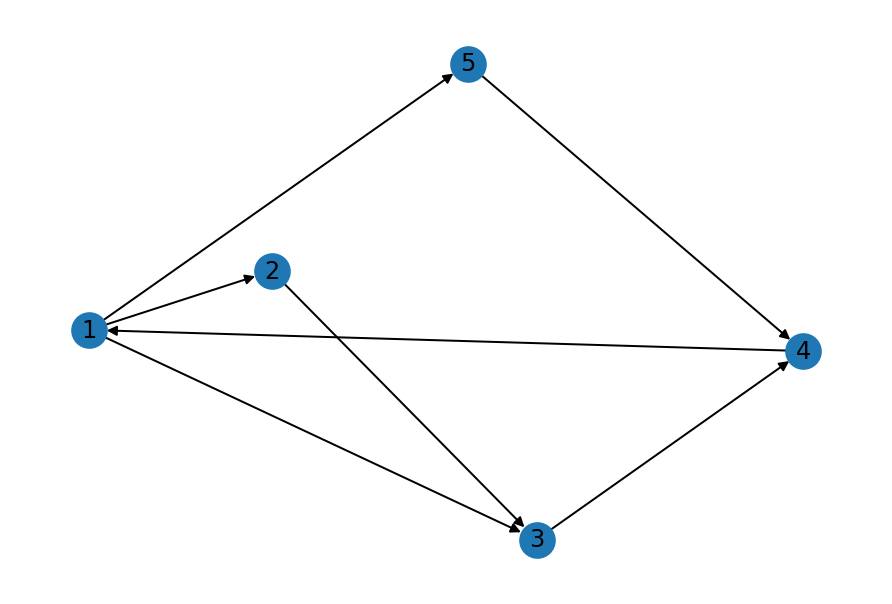

In [121]:
Gh = nx.DiGraph(Ah)
Gh = nx.relabel_nodes(Gh, {i: i+1 for i in range(N)})
nx.draw(Gh, with_labels=True)

In [123]:
Ah.sum(axis=1)

array([3, 1, 1, 1, 1])

In [124]:
Ah.sum(axis=0)

array([1, 1, 2, 2, 1])

In [126]:
from collections import Counter

In [128]:
Counter([Gh.in_degree(n) for n in Gh.nodes])

Counter({1: 3, 2: 2})

In [129]:
Counter([Gh.out_degree(n) for n in Gh.nodes])

Counter({3: 1, 1: 4})

In [130]:
nx.average_shortest_path_length(Gh)

2.0

In [132]:
Dh = np.zeros((N, N))
for node, path in nx.all_pairs_shortest_path_length(Gh):
    for end_node, lenght in path.items():
        Dh[node-1, end_node-1] = lenght
Dh

array([[0., 1., 1., 2., 1.],
       [3., 0., 1., 2., 4.],
       [2., 3., 0., 1., 3.],
       [1., 2., 2., 0., 2.],
       [2., 3., 3., 1., 0.]])

In [133]:
Dh.sum(axis=1)

array([ 5., 10.,  9.,  7.,  9.])

### e)

In [139]:
Ak = np.array([
    [0, 1, 1, 1, 1],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 1, 0],
    [0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0]
])

In [156]:
Gk = nx.DiGraph(Ak)

In [157]:
for k in range(6):
    print(f"{k=}")
    print(np.linalg.matrix_power(Ak.T, k), end="\n" * 2)

k=0
[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]

k=1
[[0 0 0 0 0]
 [1 0 0 0 0]
 [1 1 0 0 0]
 [1 0 1 0 0]
 [1 0 0 1 0]]

k=2
[[0 0 0 0 0]
 [0 0 0 0 0]
 [1 0 0 0 0]
 [1 1 0 0 0]
 [1 0 1 0 0]]

k=3
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [1 0 0 0 0]
 [1 1 0 0 0]]

k=4
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [1 0 0 0 0]]

k=5
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]



In [158]:
np.linalg.matrix_power(Ak.T, 5)

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [184]:
α = 0.2
cα = np.array([1,
               1 + α,
               1 + 2 * α + α ** 2,
               1 + 2 * α + 2 * α ** 2 + α ** 3,
               1 + 2 * α + 2 * α ** 2 + 2 * α ** 3 + α ** 4])
Cα = cα / cα.sum()
cα

array([1.    , 1.2   , 1.44  , 1.488 , 1.4976])

In [185]:
nx.centrality.katz_centrality(Gk, α, normalized=False)

{0: 1.0, 1: 1.2, 2: 1.44, 3: 1.488, 4: 1.4976}

## Question 2

In [346]:
N1 = 5
N2 = 3
N = N1 + N2

B1 = np.c_[np.zeros((N1, N1)), np.ones((N1, N2))]
B2 = np.c_[np.ones((N2, N1)), np.zeros((N2, N2))]
B = np.r_[B1, B2]
B

array([[0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 1., 1., 0., 0., 0.]])

In [347]:
Gb = nx.Graph(B)

v1_vals = [f"v1{i}" for i in range(1, N1 + 1)]
v2_vals = [f"v2{i}" for i in range(1, N2 + 1)]
v_vals = [*v1_vals, *v2_vals]

mapping = {i: node for i, node in enumerate(v_vals)}

mapping_reverse = {value: key for key, value in mapping.items()}

Gb = nx.relabel_nodes(Gb, mapping)

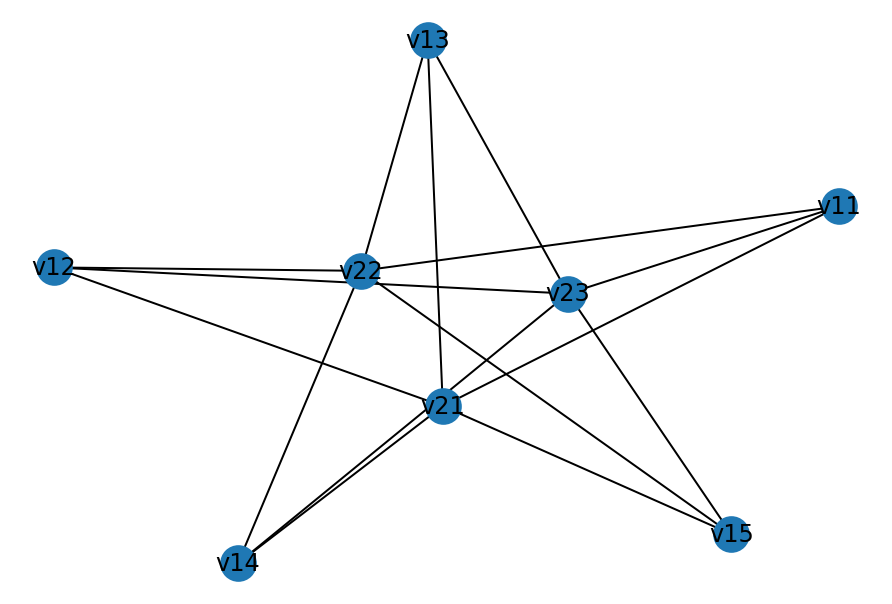

In [348]:
np.random.seed(314)
nx.draw(Gb, with_labels=True)

In [349]:
Db = np.zeros((N, N))
for node, path in nx.all_pairs_shortest_path_length(Gb):
    for end_node, lenght in path.items():
        Db[mapping_reverse[node], mapping_reverse[end_node]] = lenght
Db

array([[0., 2., 2., 2., 2., 1., 1., 1.],
       [2., 0., 2., 2., 2., 1., 1., 1.],
       [2., 2., 0., 2., 2., 1., 1., 1.],
       [2., 2., 2., 0., 2., 1., 1., 1.],
       [2., 2., 2., 2., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 0., 2., 2.],
       [1., 1., 1., 1., 1., 2., 0., 2.],
       [1., 1., 1., 1., 1., 2., 2., 0.]])

In [350]:
Db.sum()

82.0

In [351]:
2 * N1 ** 2 + 2 * N2 ** 2 + N1 * N2 - 2

81

In [352]:
N1 * N2

15

In [353]:
(Db == 1).sum(), (Db == 2).sum()

(30, 26)

In [357]:
2 * (N1 ** 2 + N2 ** 2 - N1 - N2 + N1 * N2), Db.sum()

(82, 82.0)

In [376]:
Mv = N1 ** 2 + N2 ** 2 - N1 - N2 + N1 * N2
Mv, 3/4 * N ** 2 - N

(41, 40.0)

In [354]:
2 * (N1 ** 2 + N2 ** 2 - N1 - N2 + N1 * N2) / (N * (N - 1))

1.4642857142857142

In [356]:
nx.average_shortest_path_length(Gb)

1.4642857142857142

## Question 3

In [331]:
N = 279
M = N * (N - 1) / 2
K = 2287

In [332]:
K / M

0.05897217709703205

In [333]:
2 * K / (N * (N - 1))

0.05897217709703205

In [335]:
comb(M, K)

inf